# COMPREHENSIVE DATA EXPLORATION WITH PYTHON


In [77]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

%matplotlib inline

In [78]:
#bring in the six packs
df_train = pd.read_csv('train.csv')

In [79]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2. First things first: analysing 'SalePrice'



In [80]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

房价值还算正常没有，最小值都大于0

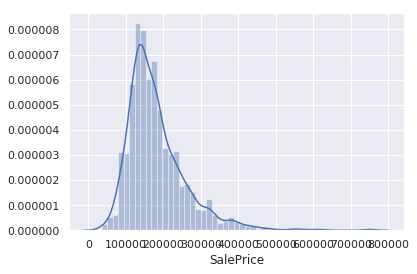

In [81]:

#histogram
sns.distplot(df_train['SalePrice']);

可以看出SalePrice字段：
偏正态分布；明显的正偏态；显示尖峰

In [82]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


打印出偏度和峰度

### Relationship with numerical variables

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


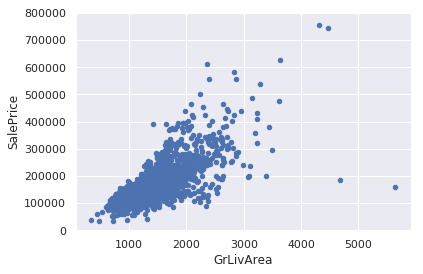

In [83]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

GrLivArea和SalePrice有线性关系

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


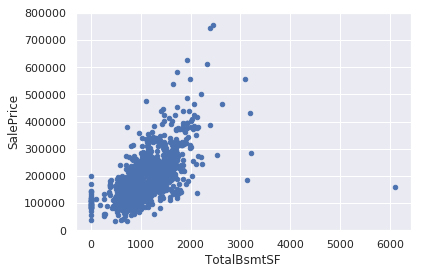

In [84]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a <b>strong linear (exponential?)</b> reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.*

### Relationship with categorical features

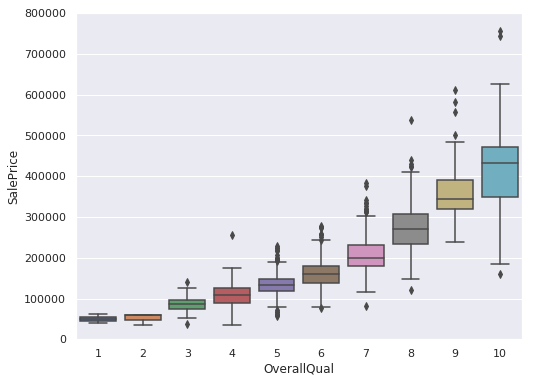

In [85]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

有些高质量的房子还是便宜的

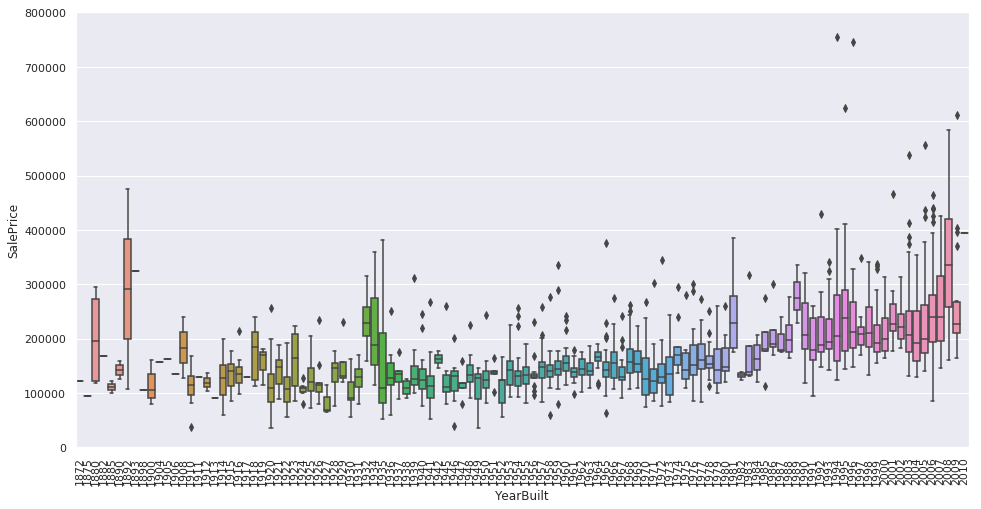

In [86]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

似乎建造年份更新的房子价格更高一些

## 小小的总结
GrLivArea和TotalBsmtSF似乎与SalePrice呈线性关系。两个关系都是正的，这意味着随着一个变量的增加，另一个也会增加。在TotalBsmtSF的例子中，我们可以看到线性关系的斜率特别高。“allqual”和“YearBuilt”似乎也与“SalePrice”有关。在“全面质量”的情况下，这种关系似乎更强，方框图显示了销售价格如何随着整体质量的提高而增长。

我们只分析了四个变量，但还有许多其他变量需要分析。这里的技巧似乎是选择正确的特性(特性选择)，而不是定义它们之间的复杂关系(特性工程)。

# 3. Keep calm and work smart

到目前为止，我们只是跟随直觉，分析我们认为重要的变量。尽管我们努力使我们的分析具有客观性，但我们必须说，我们的出发点是主观的。

画：
* Correlation matrix (heatmap style).
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

#### Correlation matrix (heatmap style)

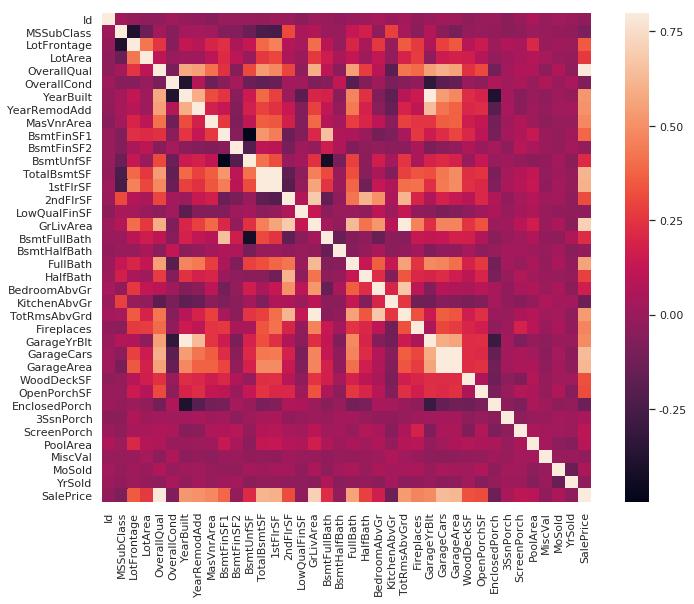

In [87]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

热度图让我们快速了解变量间的关系。在本图中越亮相关性越强。

乍一看，对角线两个比较大的白色方块引起了我的注意。第一个是指“TotalBsmtSF”和“1stFlrSF”变量，第二个是指“GarageX”变量。这两种情况都显示了这些变量之间的相关性有多么显著。实际上，这种相关性是如此之强，它可以表明一个情况的多重共线性。如果我们考虑这些变量，我们可以得出结论，它们给出了几乎相同的信息，所以多重共线性确实存在。

另一件引起我注意的事情是最后一行：“SalePrice”相关性。我们可以看到我们的“GrLivArea”，“TotalBsmtSF”和“OverallQual”比较亮相关性强，但我们也可以看到许多其他的变量应该被考虑进去。这就是我们接下来要做的。

#### 'SalePrice' correlation matrix (zoomed heatmap style)

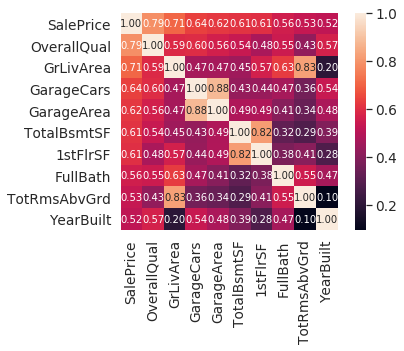

In [88]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

挑出10个与SalePrice相关性最强的看一下，大概有以下结论：
* 'OverallQual', 'GrLivArea' 和 'TotalBsmtSF'确实相关性较强
* “GarageCars”和“GarageArea”也是一些相关性最强的变量。然而，正如我们在上一个点中所讨论的，车库中容纳的汽车数量是车库面积的结果。GarageCars和GarageArea就像一对孪生兄弟。你永远也分不清他们。因此，我们在分析中只需要这些变量中的一个(我们可以保留GarageCars，因为它与“销售价格”的相关性更高)。
* TotalBsmtSF和1stFloor似乎也是孪生兄弟。我们可以保留TotalBsmtSF
* 'TotRmsAbvGrd' 和 'GrLivArea',又是孪生兄弟（0.83）


#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

/home/hjz/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


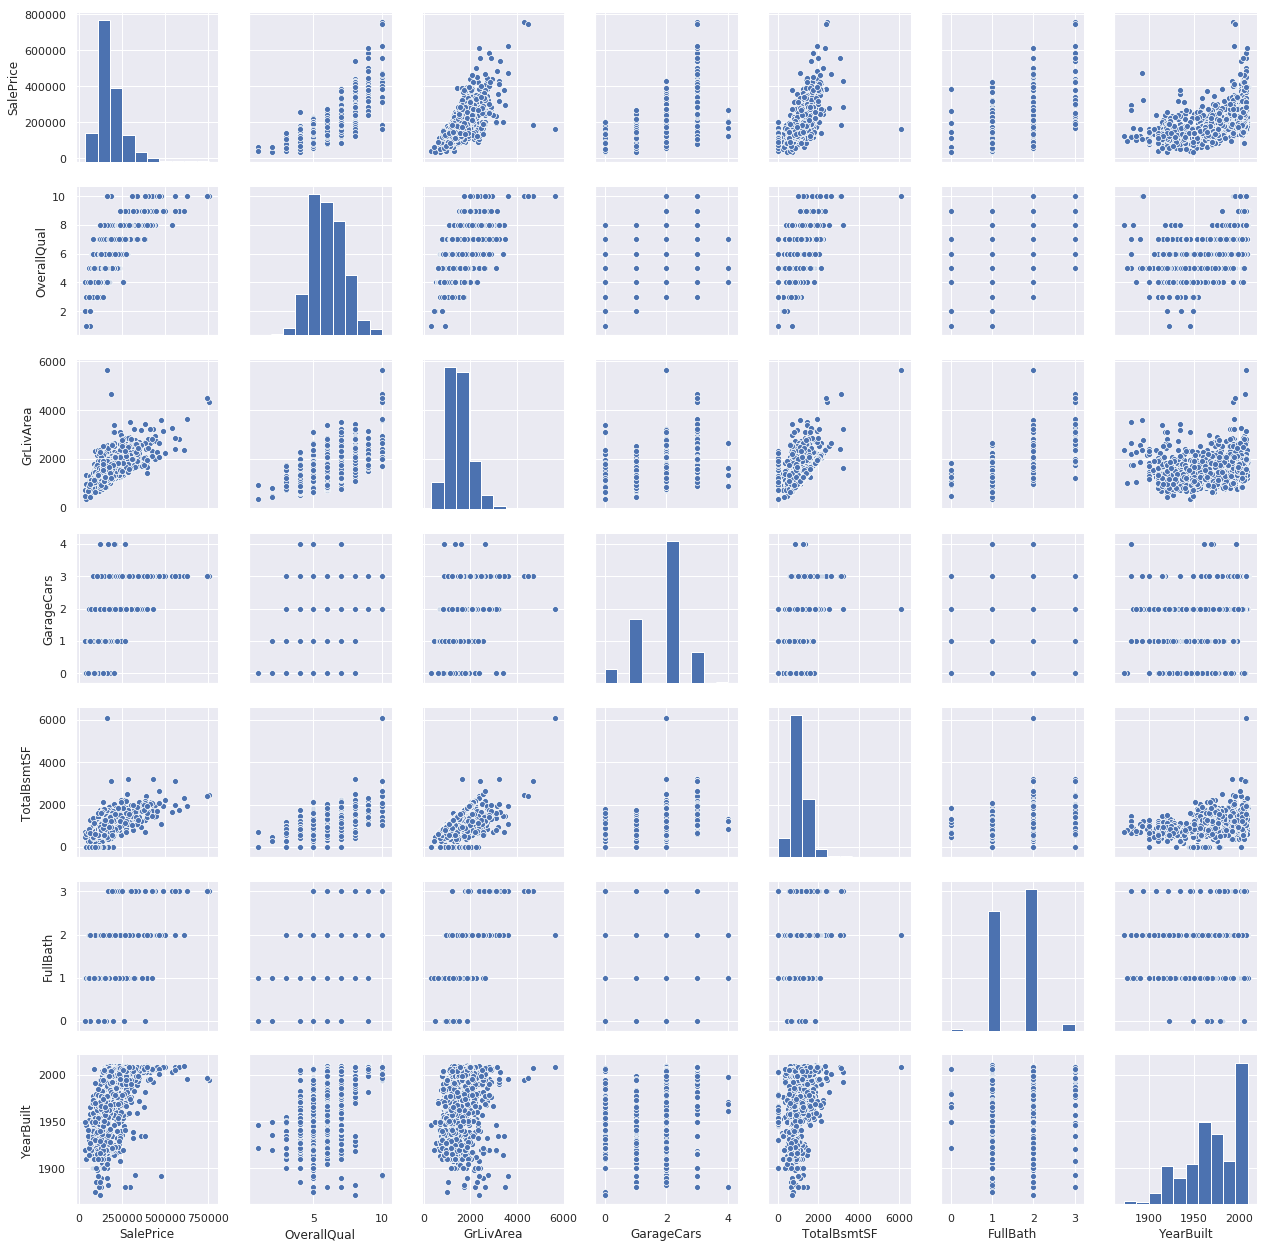

In [89]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

虽然我们已经知道了一些主要的数字，这个巨大的散点图给了我们一个关于变量关系的合理的想法。

我们可能会发现一个有趣的数字是介于TotalBsmtSF和GrLiveArea之间。在这个图中，我们可以看到点画了一条直线，它几乎像一个边界。大部分的点都在这条线下面，这是完全有道理的。地下室面积可以等于地面上的居住面积，但地下室面积不能大于地面上的居住面积。

关于“SalePrice”和“YearBuilt”的情节也能让我们思考。在“点云”的底部，我们看到一个几乎是害羞的指数函数。我们也可以在“点云”的上限上看到同样的趋势。另外，过去几年的点集倾向于保持在这个极限之上(现在价格上涨得更快了)。

# 4. Missing data

考虑缺失值时有一些问题要考虑:

* 缺失值有多普遍?
* 缺失值是随机的还是有某种特征?

这些问题的答案很重要，因为缺少数据可能意味着样本量的减少。这可以阻止我们继续分析。此外，从实质性的角度来看，我们需要确保缺失的数据过程不存在偏见，不隐藏一个难以忽视的事实。

In [90]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


打印出缺失值数量和所占比例。

我们将考虑当超过15%的数据丢失时，我们应该删除相应的变量并假装它从未存在过。这意味着在这些情况下，我们不会尝试任何技巧来填补缺失的数据。根据这一点，有一组变量。我们应该删除“PoolQC”、“MiscFeature”、“Alley”等。关键是:我们会错过这些数据吗?我不这么想。这些变量似乎都不是很重要，因为它们中的大多数都不是我们买房时考虑的方面(也许这就是数据缺失的原因吧?)此外，仔细查看变量，我们可以说像“PoolQC”、“MiscFeature”和“FireplaceQu”这样的变量是异常值的强候选变量，所以我们很乐意删除它们。

在其余的情况中，我们可以看到“GarageX”变量有相同数量的缺失数据。缺失的数据应该指的是同一组观测数据。由于关于车库最重要的信息是由“GarageCars”表示的，并且考虑到我们只讨论了5%的丢失数据，所以我将删除前面提到的“GarageX”变量。同样的逻辑也适用于'BsmtX'变量。

对于“MasVnrArea”和“MasVnrType”，我们可以认为这些变量并不重要。此外，它们与已经被考虑的YearBuilt和OverallQual有很强的相关性。因此，如果我们删除“MasVnrArea”和“MasVnrType”，我们不会丢失信息。

最后，我们有一个缺失的观察在“Electrical”。由于这只是一个观察值，我们将删除这个观察值并保留变量。

总之，为了处理丢失的数据，我们将删除除“Electrical”变量之外的所有丢失数据的变量。在“Electrical”中，我们只删除缺失数据的观察结果。

In [91]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# 异常值!

异常值也是我们应该注意的。

这里，我们将通过“销售价格”的标准差和一组散点图来快速分析。

### 单变量分析

这里主要关注的是建立一个阈值，该阈值将观察值定义为异常值。为此，我们将对数据进行标准化。在这种情况下，数据标准化意味着将数据值转换为均值为0，标准差为1。

In [92]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/home/hjz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hjz/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


'SalePrice'穿上了新的衣服:

* 低范围很相似且离0不远
* 高范围从0到7不过有些值确实超出范围

可能为7的值要小心

### 二元变量分析

重新看散点图

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


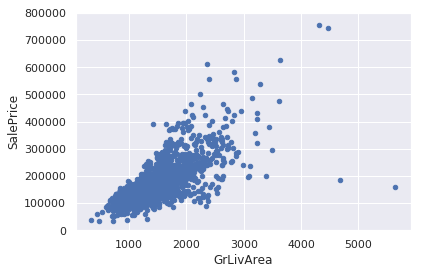

In [93]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));

发现：
* “GrLivArea”更大的两个值看起来很奇怪，而且它们并没有随波逐流。我们可以推测为什么会发生这种情况。也许他们指的是农业区，这可以解释为什么价格这么低。我不确定，但我很有信心这两点不能代表典型情况。因此，我们将把它们定义为异常值并删除它们。
* 图上方的两个观察值是7。一些我们说过要小心的观察结果。这两种情况只是在表面上有某种相似之处，其实根本不同。因此，我们将保留它们。

In [94]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


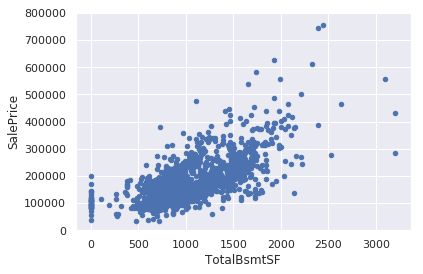

In [95]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

我们很想消除一些观察值(例如TotalBsmtSF > 3000)，但我认为这不值得。我们可以忍受，所以我们什么都不做。

# 5. Getting hard core

检验多元分析统计基础的假设。我们已经做了一些数据清理，发现了很多关于“销售价格”的信息。现在是深入了解“销售价格”如何符合统计假设的时候了，这些假设使我们能够应用多元技术。

有四个假设需要检验:

正态性，当我们讨论正态性时我们的意思是数据应该像正态分布。这很重要，因为一些统计测试依赖于此(例如t-statistics)。在这里，我们将检查“SalePrice”的单变量正态性(这是一种有限的方法)。记住，单变量正态性不能保证多变量正态性(这是我们想要的)，但它是有帮助的。另一个需要考虑的细节是，在大样本中(>200观测值)，正态性不是这样一个问题。然而，如果我们解决了正态性问题，我们就避免了很多其他问题(例如异方差)，这就是我们做这个分析的主要原因。

同方差。同方差是指“假设因变量在预测变量的范围内表现出相同的方差水平”。同方差是可取的，因为我们希望误差项在所有自变量的值上都是相同的。
线性度——评估线性度最常见的方法是检查散点图并搜索线性模式。如果模式不是线性的，那么研究数据转换是值得的。但是，我们不会深入讨论这个因为我们见过的大多数散点图都有线性关系。

缺乏相关错误——相关错误，如定义所示，发生在一个错误与另一个错误相关联时。例如，如果一个正误差系统地产生一个负误差，这意味着这些变量之间存在关系。这通常发生在时间序列中，其中一些模式与时间相关。我们也不讨论这个。但是，如果检测到什么，尝试添加一个变量来解释所得到的效果。这是相关错误最常见的解决方案。

### 研究正态性
* 直方图-峰度和偏度
* 正态概率图-数据分布应紧跟表示正态分布的对角线。

/home/hjz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


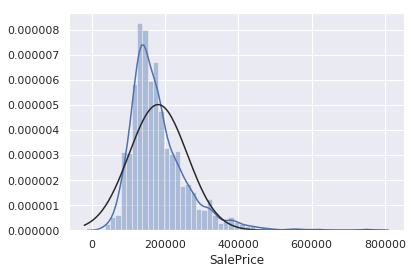

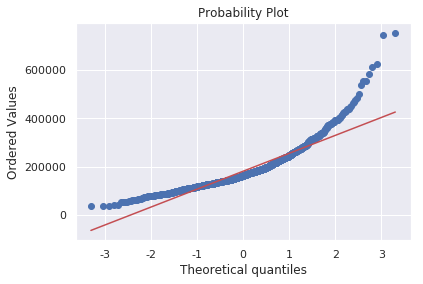

In [96]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

好吧，SalePrice不是正态分布。它显示“尖峰”，正偏度，不遵循对角线。

一个简单的数据转换就可以解决这个问题。在正偏态的情况下，log转换通常工作得很好。

In [97]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

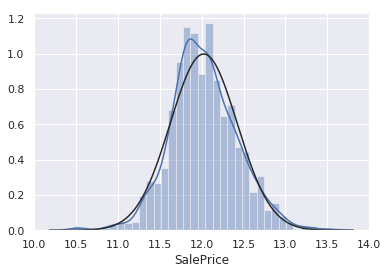

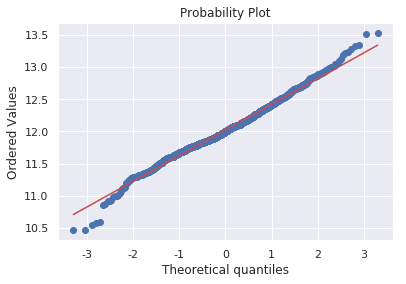

In [98]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! 接下来看'GrLivArea'.

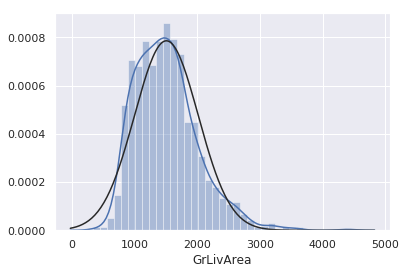

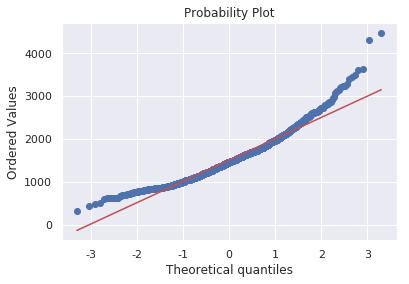

In [99]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [100]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

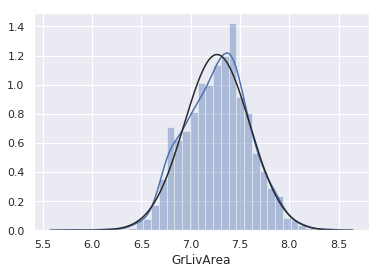

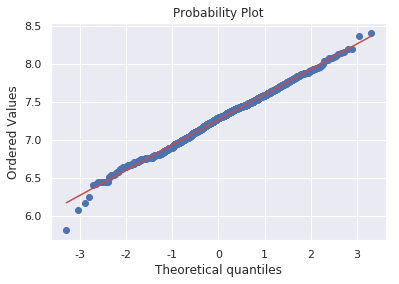

In [101]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, please...

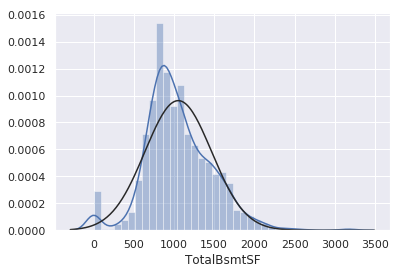

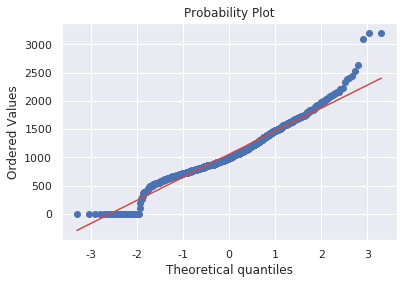

In [102]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

* 呈现偏态。
* 大量的观测值为零(没有地下室的房屋)。
* 这是个大问题，因为值0不允许我们做对数变换。

要在这里应用一个log变换，我们将创建一个变量，它可以获得拥有或不拥有地下室(二进制变量)的效果。然后，我们将对所有非零观测值进行log变换，忽略值为零的观测值。通过这种方法，我们可以转换数据，而不会失去具有或不具有地下室的效果。

In [103]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [104]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'])
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF']

0       6.752270
1       7.140453
2       6.824374
3       6.628041
4       7.043160
5       6.679599
6       7.430114
7       7.009409
8       6.858565
9       6.898715
10      6.946976
11      7.069023
12      6.815640
13      7.309212
14      7.133296
15      6.723832
16      6.911747
18      7.015712
19      6.936343
20      7.054450
21      6.456770
22      7.482682
23      6.946976
24      6.966024
25      7.356280
26      6.802395
27      7.440734
28      7.302496
29      6.253829
30      6.475433
          ...   
1430    6.595781
1431    6.864848
1432    6.486161
1433    6.841615
1434    7.026427
1435    7.184629
1436    6.761573
1437    7.566311
1438    6.815640
1439    6.289716
1440    6.376727
1441    6.742881
1442    6.924612
1443    6.858565
1444    7.259820
1445    6.701960
1446    7.080026
1447    7.106606
1448    6.327937
1449    6.445720
1450    6.797940
1451    7.360740
1452    6.304449
1453    7.038784
1454    7.107425
1455    6.859615
1456    7.340836
1457    7.0492

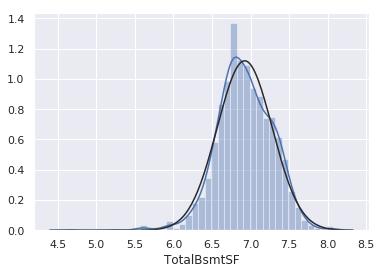

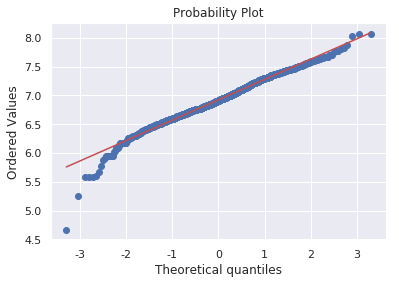

In [105]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

测试两个度量变量的同方差的最佳方法是图形化的。与等分散不同的是锥型(图的一边小分散，另一边大分散)或菱形(分布中心的大量点)。

### In the search for writing 'homoscedasticity' right at the first attempt


Starting by 'SalePrice' and 'GrLivArea'...

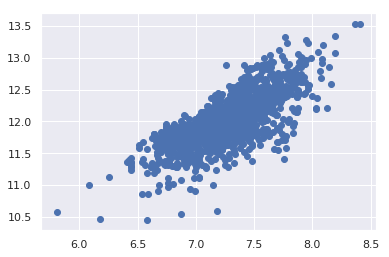

In [106]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

这个散点图的旧版本(在log转换之前)有一个圆锥形状(返回并检查“SalePrice”和相关变量之间的散点图)。当前散点图不再具有圆锥形状。这就是正态的力量!通过保证某些变量的正态性，我们解决了同方差问题。


Now let's check 'SalePrice' with 'TotalBsmtSF'.

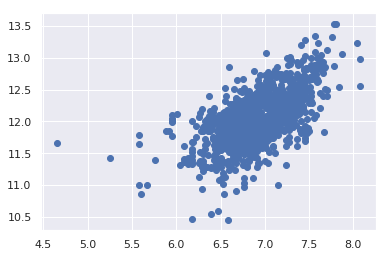

In [107]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

我们可以说，总的来说，“SalePrice”在“TotalBsmtSF”范围内表现出相同的方差水平。

# Last but not the least, dummy variables

Easy mode.

In [108]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

# Conclusion

我们对变量进行了哲学分析，我们单独分析了“SalePrice”，用最相关的变量，我们处理了缺失的数据和异常值，我们测试了一些基本的统计假设，我们甚至把类别变量转化成了虚拟变量。